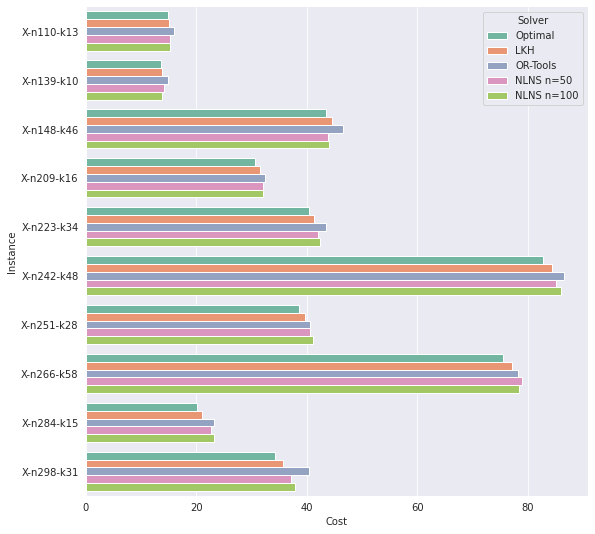

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "../res/stats/larger/"
larger = {"Optimal": pd.read_csv(path + "optimal_larger.csv", index_col=0),
          "LKH": pd.read_csv(path + "lkh_larger.csv", index_col=0),
          "OR-Tools": pd.read_csv(path + "ortools_larger.csv", index_col=0),
          f"NLNS n=50": pd.read_csv(path + f"destroy_point+tour_repair_rlagent_c50_larger.csv", index_col=0),
          f"NLNS n=100": pd.read_csv(path + f"destroy_point+tour+resgatedgcn_repair_rlagent_c100_larger.csv", index_col=0)}

dfs = list(larger.values())
names = list(larger.keys())

for df, name in zip(dfs, names):
    df["solver"] = name

larger_df = pd.concat(dfs)
larger_df.index.rename('instance', inplace=True)
larger_df.reset_index(inplace=True)
del larger_df["time"]
larger_df["instance"] = larger_df["instance"].map(lambda inst: inst[:-4])

plt.figure(figsize=(9, 9))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=larger_df, x="cost", y='instance', hue='solver')
# plt.title('')
plt.xlabel('Cost')
plt.ylabel('Instance')
plt.legend(title='Solver', loc='upper right')

sns.despine()
plt.show()